### Load All The Necessary Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras.models import Model
from keras.layers import LSTM, Activation, Dense, Dropout, Input, Embedding
from keras.layers import TimeDistributed
from keras.layers import Bidirectional

from keras.preprocessing.text import Tokenizer
from keras.preprocessing import sequence
from keras.utils import to_categorical
from keras.callbacks import EarlyStopping
from keras.utils import np_utils
from keras.models import Sequential
from keras.callbacks import ModelCheckpoint

from keras.models import *
from keras.layers import *
from keras.optimizers import *
import keras
from keras import losses
from keras import backend as K
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Conv2DTranspose
from keras import optimizers
from keras.optimizers import SGD
from keras.optimizers import RMSprop
from keras.optimizers import Adam
from keras.layers.advanced_activations import ELU
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
from tensorflow.python.platform import build_info as tf_build_info
import pickle

from keras.utils.vis_utils import plot_model

%matplotlib inline

Using TensorFlow backend.


In [2]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt; 

import warnings
warnings.filterwarnings('ignore')

from keras.utils import plot_model
from keras.utils.vis_utils import plot_model
import pydot

import sys
import random
import warnings

from PIL import Image
from skimage import data, io, filters
import numpy as np
import pandas as pd
from scipy import ndimage
from matplotlib import pyplot as plt
import matplotlib.image as mpimg
from keras.preprocessing.image import ImageDataGenerator
from sklearn import manifold, datasets

from tqdm import tqdm
from itertools import chain
from skimage.io import imread, imshow, imread_collection, concatenate_images
from pylab import imread,subplot,imshow,show
from skimage.transform import resize
from skimage.morphology import label
from keras.preprocessing import image
import cv2

import tensorflow as tf
from tensorflow import keras
import keras

### Load Test Data for LSTM

In [4]:
H = pd.read_csv("J:\\Chohee_paper_update\\Model Code & Trained Models\\Internal Test Set\\Grade3_vs_Grade5_H_FOS.csv",sep=',',encoding="utf-8",error_bad_lines=False,low_memory = False)

E = pd.read_csv("J:\\Chohee_paper_update\\Model Code & Trained Models\\Internal Test Set\\Grade3_vs_Grade5_E_FOS.csv",sep=',',encoding="utf-8",error_bad_lines=False,low_memory = False)


H_labels = H['Label']
E_labels = E['Label']


### Load Test Data for Machine Learning

In [19]:
## Load Data For Machine Learning

HE = pd.read_csv("J:\\Chohee_paper_update\\Model Code & Trained Models\\Internal Test Set\\Grade3_vs_Grade5_HE_FOS.csv",sep=',',encoding="utf-8",error_bad_lines=False,low_memory = False)
# H_FOS['label_cat'] = H_FOS['Label'].map(lambda x: to_categorical(x, 1+Red_data['Label'].max()))

HE_labels = HE['Label']

# data = data.dropna()

### Data Normalization for Machine Learning

In [20]:
df = HE.iloc[:,1:]

HE_scaled = (df - df.mean()) / df.std()

HE_scaled

,Energy_H,Entropy_H,Kurtosis_H,Skewness_H,Variance_H,Energy_H.1,Entropy_H.1,Kurtosis_H.1,Skewness_H.1,Variance_H.1
0,-0.110679,0.423947,-0.391277,0.355951,-0.183506,-0.631378,0.161116,0.096084,0.576008,-0.234984
1,0.147303,0.470939,-0.381687,0.327270,-0.139225,-0.364966,0.834642,-0.399588,0.904398,0.498873
2,-0.672789,0.736036,-0.766778,1.175271,0.115759,-1.021334,0.428259,-0.630405,0.267940,0.044464
3,0.291179,0.309849,-0.199953,0.210654,-0.253905,-0.333935,1.338924,-0.625454,0.717380,1.324913
4,0.055663,0.251089,-0.428633,0.127917,0.126947,-0.251523,0.846040,-0.084933,1.053690,0.625737
...,...,...,...,...,...,...,...,...,...,...
1595,-0.094393,-1.973084,0.447165,-1.288705,0.160295,0.259123,-1.111079,1.200493,1.119860,-0.862117
1596,0.688057,-1.071831,0.632891,-1.134632,-0.327479,1.004952,0.190820,-0.935124,0.138752,-0.255794
1597,-0.559076,0.898574,-0.887696,0.745658,1.799536,0.934957,0.195270,-0.823871,0.560617,-0.067102
1598,1.108120,-2.404894,1.776873,-2.140560,-0.083434,-0.215289,0.385063,-0.475371,1.007878,0.021653


### Data Normalization for LSTM

In [5]:
## Data Normalization for H or HE

df = H.iloc[:,1:]

H_scaled = (df - df.mean()) / df.std()

H_scaled

,Energy,Entropy,Kurtosis,Skewness,Variance
0,-0.110679,0.423947,-0.391277,0.355951,-0.183506
1,0.147303,0.470939,-0.381687,0.327270,-0.139225
2,-0.672789,0.736036,-0.766778,1.175271,0.115759
3,0.291179,0.309849,-0.199953,0.210654,-0.253905
4,0.055663,0.251089,-0.428633,0.127917,0.126947
...,...,...,...,...,...
1595,-0.094393,-1.973084,0.447165,-1.288705,0.160295
1596,0.688057,-1.071831,0.632891,-1.134632,-0.327479
1597,-0.559076,0.898574,-0.887696,0.745658,1.799536
1598,1.108120,-2.404894,1.776873,-2.140560,-0.083434


In [6]:
df = E.iloc[:,1:]

E_scaled =  (df - df.mean()) / df.std()

E_scaled

,Energy,Entropy,Kurtosis,Skewness,Variance
0,-0.631378,0.161116,0.096084,0.576008,-0.234984
1,-0.364966,0.834642,-0.399588,0.904398,0.498873
2,-1.021334,0.428259,-0.630405,0.267940,0.044464
3,-0.333935,1.338924,-0.625454,0.717380,1.324913
4,-0.251523,0.846040,-0.084933,1.053690,0.625737
...,...,...,...,...,...
1595,0.259123,-1.111079,1.200493,1.119860,-0.862117
1596,1.004952,0.190820,-0.935124,0.138752,-0.255794
1597,0.934957,0.195270,-0.823871,0.560617,-0.067102
1598,-0.215289,0.385063,-0.475371,1.007878,0.021653


### Convert Scaled Data to Array and Data Label to Categorical

In [7]:
H_test_data = np.asarray(H_scaled)
H_test_data_label = np.asarray(H_labels)
H_test_data_label = to_categorical(H_test_data_label)

print(H_test_data.shape)
print(H_test_data_label.shape)


(1600, 5)
(1600, 2)


In [8]:
## E_Data

E_test_data = np.asarray(E_scaled)
E_test_data_label = np.asarray(E_labels)
E_test_data_label = to_categorical(E_test_data_label)

print(E_test_data.shape)
print(E_test_data_label.shape)


(1600, 5)
(1600, 2)


### Data Reshape for LSTM

In [9]:
H_X_test = H_test_data.reshape((H_test_data.shape[0], H_test_data.shape[1], 1))

H_X_test.shape


(1600, 5, 1)

In [10]:
E_X_test = E_test_data.reshape((E_test_data.shape[0], E_test_data.shape[1], 1))

E_X_test.shape


(1600, 5, 1)

### Dual-Channel LSTM Model

In [11]:
def RNN(mode):
    
    Hinputs = Input(name='Hinputs',shape=(H_X_test.shape[1], H_X_test.shape[2]))
    
    Hlayer = Bidirectional(LSTM(64, return_sequences=True, activation="tanh", recurrent_activation="sigmoid", use_bias=True,
                                bias_initializer="zeros", recurrent_dropout=0.7, kernel_initializer="glorot_uniform",
                                recurrent_initializer="orthogonal"))(Hinputs)
    Hlayer = Bidirectional(LSTM(64, recurrent_activation="sigmoid", use_bias=True, activation="tanh", bias_initializer="zeros", 
                                recurrent_dropout=0.7, kernel_initializer="glorot_uniform", 
                                recurrent_initializer="orthogonal"))(Hlayer)
    
    Einputs = Input(name='Einputs',shape=(E_X_test.shape[1], E_X_test.shape[2]))
    
    Elayer = Bidirectional(LSTM(64, return_sequences=True, activation="tanh", recurrent_activation="sigmoid", use_bias=True,
                                bias_initializer="zeros", recurrent_dropout=0.7, kernel_initializer="glorot_uniform",
                               recurrent_initializer="orthogonal"))(Einputs)
    Elayer = Bidirectional(LSTM(64, activation="tanh", recurrent_activation="sigmoid", use_bias=True,
                                bias_initializer="zeros", recurrent_dropout=0.7, kernel_initializer="glorot_uniform",
                                recurrent_initializer="orthogonal"))(Elayer)

    Cont_HE = concatenate([Hlayer, Elayer])
    
    HElayer = Dense(2, name='out_layer')(Cont_HE)
    HElayer = Activation('sigmoid')(HElayer)
    model = Model(inputs=[Hinputs, Einputs], outputs=HElayer)
    
    return model


### Model Architecture After Building The Model

In [12]:
model = RNN('concat')
model.summary()

W0310 00:18:08.548688   604 deprecation_wrapper.py:119] From c:\users\subrata\anaconda3\envs\deeplearning\lib\site-packages\keras\backend\tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0310 00:18:08.607647   604 deprecation_wrapper.py:119] From c:\users\subrata\anaconda3\envs\deeplearning\lib\site-packages\keras\backend\tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0310 00:18:08.612645   604 deprecation_wrapper.py:119] From c:\users\subrata\anaconda3\envs\deeplearning\lib\site-packages\keras\backend\tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0310 00:18:08.909690   604 deprecation_wrapper.py:119] From c:\users\subrata\anaconda3\envs\deeplearning\lib\site-packages\keras\backend\tensorflow_backend.py:133: The name tf.placeholder_with_default is deprecated. Please use tf.compat.v1.p

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
Hinputs (InputLayer)            (None, 5, 1)         0                                            
__________________________________________________________________________________________________
Einputs (InputLayer)            (None, 5, 1)         0                                            
__________________________________________________________________________________________________
bidirectional_1 (Bidirectional) (None, 5, 128)       33792       Hinputs[0][0]                    
__________________________________________________________________________________________________
bidirectional_3 (Bidirectional) (None, 5, 128)       33792       Einputs[0][0]                    
__________________________________________________________________________________________________
bidirectio

### Load Model Weights (LSTM)

In [13]:
model.load_weights('HE_LSTM_FOS.h5')

W0310 00:18:16.802711   604 deprecation_wrapper.py:119] From c:\users\subrata\anaconda3\envs\deeplearning\lib\site-packages\keras\backend\tensorflow_backend.py:174: The name tf.get_default_session is deprecated. Please use tf.compat.v1.get_default_session instead.



### Compile The Model

In [14]:
model.compile(loss="binary_crossentropy", optimizer= 'sgd', metrics=['accuracy', 'categorical_accuracy'])

W0310 00:18:20.822012   604 deprecation_wrapper.py:119] From c:\users\subrata\anaconda3\envs\deeplearning\lib\site-packages\keras\optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0310 00:18:20.862014   604 deprecation.py:323] From c:\users\subrata\anaconda3\envs\deeplearning\lib\site-packages\tensorflow\python\ops\nn_impl.py:180: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


### Evaluate The Model Using Test Set

In [15]:
print("-- Evaluate --")

scores = model.evaluate([H_X_test, E_X_test], H_test_data_label, verbose=1)

-- Evaluate --
1600/1600 [==============================] - ETA: 1: - ETA: 30s - ETA: 18 - ETA: 13 - ETA: 10 - ETA: 8 - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - 4s 2ms/step


### Print Accuracy

In [16]:
print("%s: %.2f%%" %(model.metrics_names[1], scores[1]*100))
print("%s: %.2f%%" %(model.metrics_names[0], scores[0]*100))

acc: 93.59%
loss: 17.30%


### Prediction

In [17]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report

preds_Y = model.predict([H_X_test, E_X_test], batch_size = 8, verbose = 1)

preds = np.argmax(preds_Y, -1)
label_Y = np.argmax(H_test_data_label, -1)

1600/1600 [==============================] - ETA: 2: - ETA: 53s - ETA: 34 - ETA: 25 - ETA: 21 - ETA: 18 - ETA: 16 - ETA: 14 - ETA: 13 - ETA: 12 - ETA: 11 - ETA: 10 - ETA: 10 - ETA: 9 - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - 6s 4ms/step


### Confusio Matrix & Classification Report

In [18]:
print(classification_report(label_Y, preds))

print(confusion_matrix(label_Y, preds))

              precision    recall  f1-score   support

           0       0.91      0.96      0.94       800
           1       0.96      0.91      0.93       800

    accuracy                           0.94      1600
   macro avg       0.94      0.94      0.94      1600
weighted avg       0.94      0.94      0.94      1600

[[771  29]
 [ 74 726]]


### Machine Learning Classification

In [21]:
## Load necessary libraries

from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn import svm
from sklearn.svm import SVC
from sklearn.calibration import CalibratedClassifierCV 
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

from sklearn.neural_network import MLPClassifier

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report



from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier

from sklearn.pipeline import Pipeline
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score

from sklearn.feature_selection import RFE
from sklearn.model_selection import StratifiedKFold
from sklearn import model_selection

from sklearn.metrics import roc_auc_score


### Load All The Models

In [22]:
SVM = 'SVM.sav'

loaded_SVM = pickle.load(open(SVM, 'rb'))

In [23]:
LR = 'LR.sav'

loaded_LR = pickle.load(open(LR, 'rb'))

In [24]:
Bagging = 'Bagging.sav'

loaded_Bagging = pickle.load(open(Bagging, 'rb'))

In [25]:
Boost = 'Adaboost.sav'

loaded_Adaboost = pickle.load(open(Boost, 'rb'))

### Prediction And Result of Classification

In [26]:
Predict = loaded_SVM.predict(HE_scaled)

In [27]:
print('Accuracy on Test Data: %2.2f%%' % (accuracy_score(HE_labels, Predict)*100))

print(classification_report(HE_labels, Predict))
print(confusion_matrix(HE_labels, Predict))

Accuracy on Test Data: 85.19%
              precision    recall  f1-score   support

           0       0.82      0.90      0.86       800
           1       0.89      0.81      0.85       800

    accuracy                           0.85      1600
   macro avg       0.85      0.85      0.85      1600
weighted avg       0.85      0.85      0.85      1600

[[716  84]
 [153 647]]


### Compute ROC Curve for Machine learnign Classifier

In [ ]:
probs = loaded_Adaboost.predict_proba(HE_scaled) ## test data
probs = probs[:, 1]
n_prob = [0 for _ in range(len(HE_labels))]  ## test label
n_auc = roc_auc_score(HE_labels, n_prob)
l_auc = roc_auc_score(HE_labels, probs)

from sklearn.metrics import roc_curve
from matplotlib import pyplot

###Set the font dictionaries (for plot title and axis titles)
title_font = {'fontname':'Arial', 'size':'20', 'color':'black', 'weight':'normal',
              'verticalalignment':'bottom'} # Bottom vertical alignment for more space
axis_font = {'fontname':'Arial', 'size':'22', 'color':'black'}


# ns_fpr, ns_tpr, _ = roc_curve(test_label, ts_probs) #baseline
# lr2 , tr2, _ = roc_curve(test_label, preds1)

ns, fs, _ = roc_curve(HE_labels, n_prob) #baseline
lr , tr, _ = roc_curve(HE_labels, probs)

print('AUC: ROC AUC=%.2f' % (l_auc*100))

### Compute ROC curve For LSTM Model

In [ ]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
from itertools import cycle
from matplotlib import pyplot
from scipy import interp

n_classes = 2

fpr2 = dict()
tpr2 = dict()
thresholds2 = dict()
roc_auc2 = dict()

for i in range(n_classes):
    fpr2[i], tpr2[i], thresholds2 = roc_curve(H_train_data_label[:, i], preds_Y[:, i])
    roc_auc2[i] = auc(fpr2[i], tpr2[i])


In [ ]:
# Compute macro-average ROC curve and ROC area

# First aggregate all false positive rates
all_fpr2 = np.unique(np.concatenate([fpr2[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr2 = np.zeros_like(all_fpr2)
for i in range(n_classes):
    mean_tpr2 += interp(all_fpr2, fpr2[i], tpr2[i])

# Finally average it and compute AUC
mean_tpr2 /= n_classes

fpr2["macro"] = all_fpr2
tpr2["macro"] = mean_tpr2
roc_auc2["macro"] = auc(fpr2["macro"], tpr2["macro"])


### Plot ROC Curve

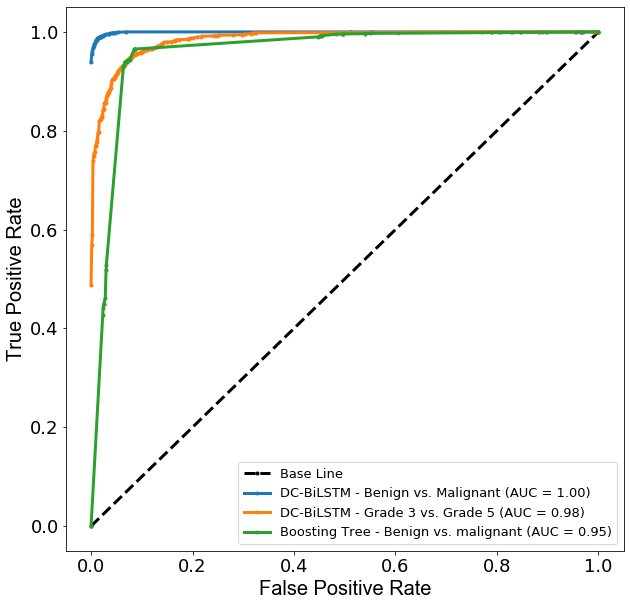

In [60]:
title_font = {'fontname':'Arial', 'size':'18', 'color':'black', 'weight':'normal',
              'verticalalignment':'bottom'} # Bottom vertical alignment for more space
axis_font = {'fontname':'Arial', 'size':'20', 'color':'black'}

fig = pyplot.figure(figsize=(10, 10))
# pyplot.title("ROC Curve", **title_font)
pyplot.plot([0, 1], [0, 1], color='black', linestyle='--', label ='Base Line', linewidth=3, marker='.')
pyplot.plot(fpr1["macro"], tpr1["macro"], label='DC-BiLSTM - Benign vs. Malignant (AUC = %0.2f)' % (roc_auc1["macro"]), linewidth=3, marker='.')
pyplot.plot(fpr2["macro"], tpr2["macro"], label='DC-BiLSTM - Grade 3 vs. Grade 5 (AUC = %0.2f)' % (roc_auc2["macro"]), linewidth=3, marker='.')
pyplot.plot(lr , tr, marker='.', label ='Boosting Tree - Benign vs. malignant (AUC = 0.95)', linewidth=3)

plt.tick_params(labelsize=14)

# axis labels
pyplot.xlabel('False Positive Rate', **axis_font)
pyplot.ylabel('True Positive Rate', **axis_font)
# show the legend
pyplot.tick_params(labelsize=18, labelcolor= "black")
pyplot.legend(loc="lower right", prop={"size":13})
# show the plot
pyplot.show()
